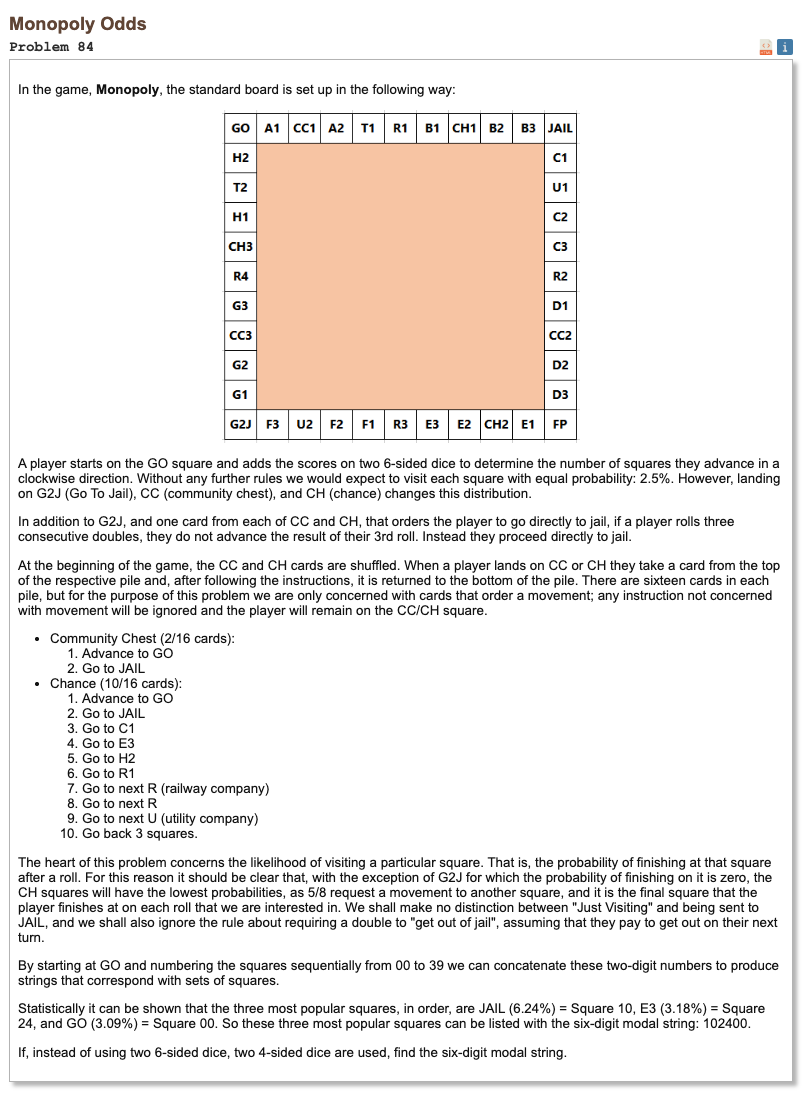

## Initial approach

* simulate dice rolls by rolling two 4-sided dice repeatedly.
* track the player’s current position after each move.
* draw and apply effects from Chance and Community Chest cards.
* follow special rules like going to jail or rolling three doubles.
* count visits to each square and find the top three most visited.

* now define cards lists

In [1]:
import numpy as np
import random

board_size = 40
visits = np.zeros(board_size, dtype=int)
position = 0
doubles_count = 0
num_trials = 1000000

community_chest_cards = [0, 10] + [-1] * 14
chance_cards = [0, 10, 11, 24, 39, 5, 'next_rail', 'next_rail', 'next_util', 'back_3'] + [-1] * 6

cc_index = 0
ch_index = 0

* add card functions
* decide what happens when a card is drawn

In [2]:
def draw_cc():
    global cc_index
    card = community_chest_cards[cc_index]
    cc_index = (cc_index + 1) % len(community_chest_cards)
    return card

def draw_ch(pos):
    global ch_index
    card = chance_cards[ch_index]
    ch_index = (ch_index + 1) % len(chance_cards)
    if card == -1:
        return pos
    elif card == 'next_rail':
        if pos < 5 or pos >= 35:
            return 5
        elif pos < 15:
            return 15
        elif pos < 25:
            return 25
        else:
            return 35
    elif card == 'next_util':
        return 12 if pos < 12 or pos >= 28 else 28
    elif card == 'back_3':
        return (pos - 3) % board_size
    else:
        return card

* apply game rules
* special square effects like "go to jail", "chance" or "community chest"

In [3]:
def apply_rules(pos):
    if pos == 30:
        return 10
    elif pos in [2, 17, 33]:
        card = draw_cc()
        return pos if card == -1 else card
    elif pos in [7, 22, 36]:
        new_pos = draw_ch(pos)
        if new_pos in [2, 17, 33]:
            card = draw_cc()
            return new_pos if card == -1 else card
        elif new_pos == 30:
            return 10
        else:
            return new_pos
    else:
        return pos

* simulation!
* roll the dice, move, apply rules and count visits.

In [4]:
for _ in range(num_trials):
    die1 = random.randint(1, 4)
    die2 = random.randint(1, 4)

    if die1 == die2:
        doubles_count += 1
    else:
        doubles_count = 0

    if doubles_count == 3:
        position = 10
        doubles_count = 0
    else:
        position = (position + die1 + die2) % board_size
        position = apply_rules(position)

    visits[position] += 1

top3 = np.argsort(visits)[-3:][::-1]
print("Result: ", "".join(f"{i:02}" for i in top3))

Result:  101524
